In [7]:
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

exp_json = "./experiment-20251212.json"

df = pd.read_json(exp_json)
df.to_pickle("experiment.pickle")
df.to_csv("experiment.csv")
#print("Experiment:")
#print(df)

In [8]:
import numpy as np

methods = set(df['method'])
for method in methods:
    print(f"{method}: \t{np.mean(df[df["method"] == method]['best_score']):.8f}",end="")
    print(f" {np.std(df[df["method"] == method]['best_score']):.8f}")

bruteforce: 	29.79494641 45.82631142
hillclimb: 	22.57498643 35.06169600
buildingwalk: 	19.17160527 37.24274887
dfs: 	26.09959145 41.57965714


In [9]:
for method in methods:
    print(f"{method}: \t{np.mean(df[df["method"] == method]['execution_time']):.8f}",end="")
    print(f" {np.std(df[df["method"] == method]['execution_time']):.8f}")

bruteforce: 	6.67711630 4.83391935
hillclimb: 	2.55010461 1.27226742
buildingwalk: 	4.92734111 4.09812031
dfs: 	4.58724030 1.95811307


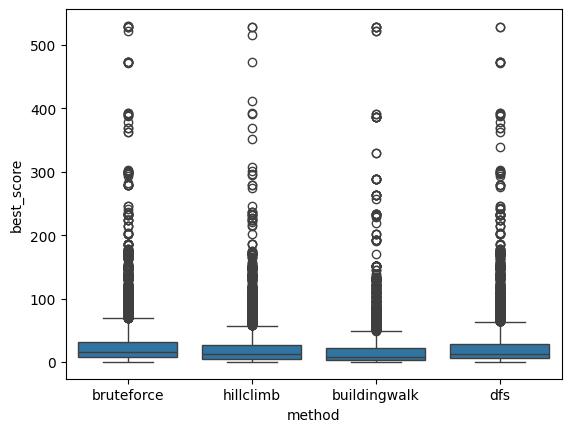

In [10]:
#sns.boxplot(data=df, x="method", y="execution_time")
sns.boxplot(data=df, x="method", y="best_score")
plt.show()

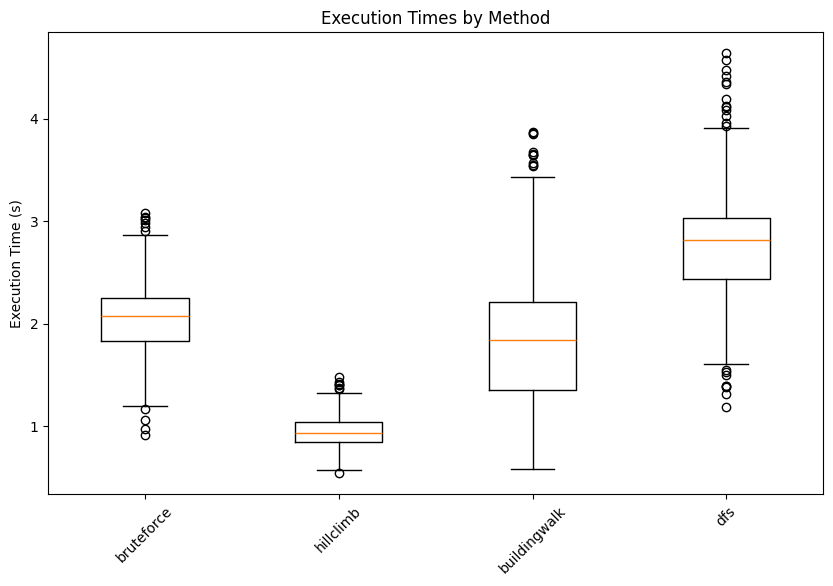

In [16]:
plt.figure(figsize=(10, 6))

methods = df["method"].unique()

data = [
    df[(df["method"] == m) & 
        (df["radius"] == 100) &
        (df["dist_weight"] == 0)
    ]
        ["execution_time"]
    for m in methods
]

plt.boxplot(data, tick_labels=methods)

plt.title("Execution Times by Method")
plt.ylabel("Execution Time (s)")
plt.xticks(rotation=45)

plt.show()

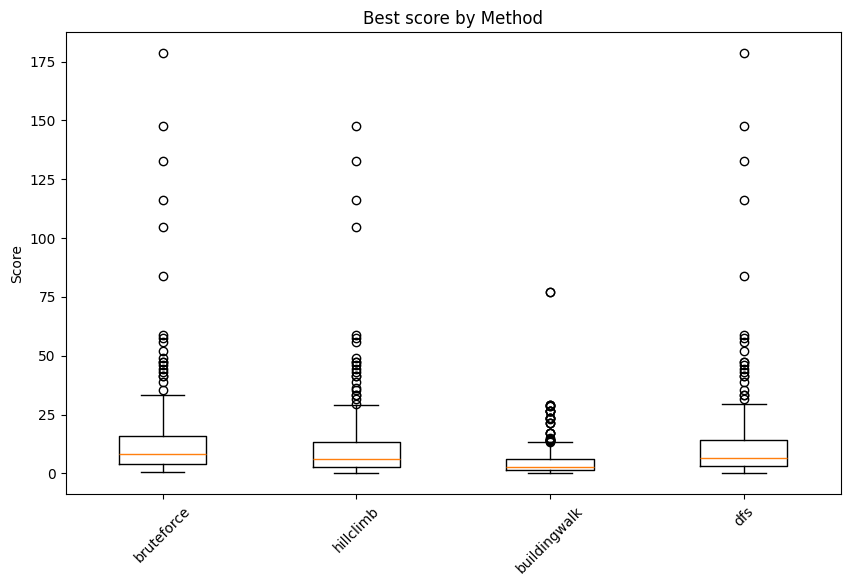

In [17]:
plt.figure(figsize=(10, 6))

methods = df["method"].unique()

data = [
    df[(df["method"] == m) & 
        (df["radius"] == 100) &
        (df["dist_weight"] == 1)
    ]
        ["best_score"]
    for m in methods
]

plt.boxplot(data, tick_labels=methods)
#plt.yscale("log")
plt.title("Best score by Method")
plt.ylabel("Score")
plt.xticks(rotation=45)

plt.show()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

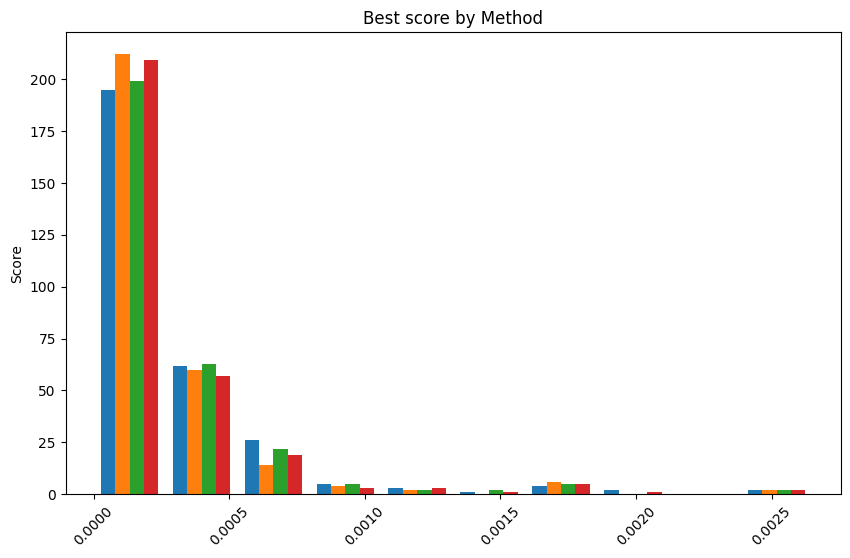

In [59]:
plt.figure(figsize=(10, 6))
#print(df)
methods = df["method"].unique()

data = [
    df[(df["method"] == m) & 
        (df["radius"] == 100) &
        (df["dist_weight"] == 0)
    ]
        ["best_score"]
    for m in methods
]

plt.hist(data)

plt.title("Best score by Method")
plt.ylabel("Score")
plt.xticks(rotation=45)

plt.show()